1. Data Cleaning and Preparation

In [8]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Ariel\Documents\KULIAH\Semester 5\Data mining B\AFL 2\customer_analysis.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Cek missing value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

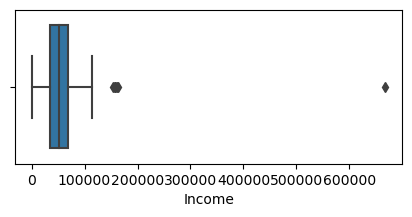

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 2))
sns.boxplot(x=df['Income'])
plt.show()

In [11]:
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

In [12]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [14]:
from sklearn.preprocessing import LabelEncoder
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_Status'] = LabelEncoder().fit_transform(df['Marital_Status'])

2. Feature Engineering

In [15]:
#Age Extraction
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_Birth']

In [16]:
#Spending Power
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Spent'] = df[categories].sum(axis=1)

In [17]:
#Household Living Arrangement
df['Living_With'] = df['Marital_Status'].replace({
    'Married': 'With Spouse',
    'Together': 'With Partner',
    'Single': 'Single',
    'Divorced': 'Divorced',
    'Widow': 'Widow'
})

In [18]:

#Family Dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

In [19]:

#Family Unity
df['Family_Size'] = df['Children'] + 2  # Dua (orang tua) ditambah jumlah anak

In [20]:
#Parental Status
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
#Educational Evolution
df['Education'] = df['Education'].replace({
    'Basic': 'Basic Education',
    '2n Cycle': '2nd Cycle Education',
    'Graduation': 'Graduation',
    'Master': 'Master',
    'PhD': 'PhD'
})

In [22]:
#Farewell to Redundancy
redundant_features = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Marital_Status'] 
df.drop(columns=redundant_features, inplace=True)

In [23]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,66,1617,4,0,2,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,69,27,4,2,4,1
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,776,5,0,2,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,39,53,5,1,3,1
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,42,422,3,1,3,1


3. Data Preparation

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.350141,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.262111,-0.11651,-0.097282,2.388846,0.985345,1.679417,0.251004,-1.264505,-1.264505,-1.584605
1,-0.350141,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.262111,-0.11651,-0.097282,-0.418612,1.235733,-0.961275,0.251004,1.396361,1.396361,0.631072
2,-0.350141,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.262111,-0.11651,-0.097282,-0.418612,0.317643,0.282673,1.180340,-1.264505,-1.264505,-1.584605
3,-0.350141,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.268149,-0.918094,1.180340,0.065928,0.065928,0.631072
4,1.428354,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.017761,-0.305254,-0.678332,0.065928,0.065928,0.631072


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_components = 2 
pca = PCA(n_components=n_components)
pca.fit(df)
pca_result = pca.transform(df)
df_pca = pd.DataFrame(data=pca_result, columns=[f"PCA{i+1}" for i in range(pca_result.shape[1])])
df_pca.head()

,PCA1,PCA2
0,4.748205,-0.116589
1,-3.197671,0.506306
2,2.513850,-1.111253
3,-2.487729,-1.712150
4,-0.662055,0.194650


4. Clustering

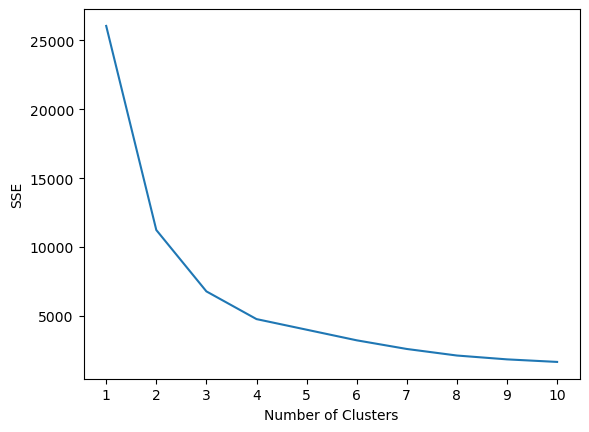

The best k for your model is 3


In [27]:
from sklearn.cluster import KMeans

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300, "random_state": 42,}
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(df_pca)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('The best k for your model is', findknee.elbow)

In [28]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3  
model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = model.fit_predict(df_pca)
df_pca['Cluster_Label'] = cluster_labels
df_pca

,PCA1,PCA2,Cluster_Label
0,4.748205,-0.116589,1
1,-3.197671,0.506306,0
2,2.513850,-1.111253,1
3,-2.487729,-1.712150,0
4,-0.662055,0.194650,0
...,...,...,...
2235,2.077132,2.026281,2
2236,-2.657097,4.304422,2
2237,2.642408,-0.993851,1
2238,1.353348,1.653601,2


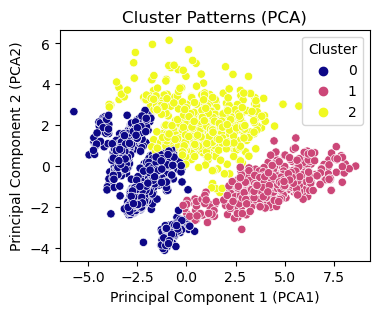

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=cluster_labels, palette='plasma')
plt.title('Cluster Patterns (PCA)')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Cluster')
plt.show()

5. Visualization

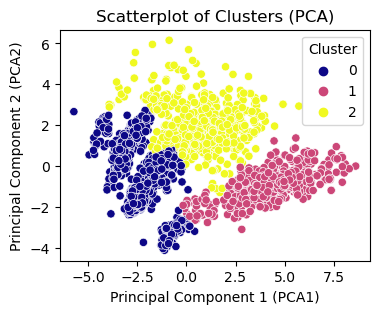

In [30]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Label', data=df_pca, palette='plasma')
plt.title('Scatterplot of Clusters (PCA)')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Cluster')
plt.show()

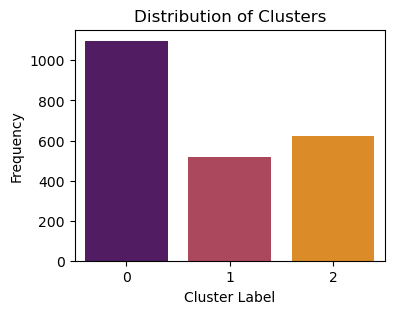

In [31]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Cluster_Label', data=df_pca, palette='inferno')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

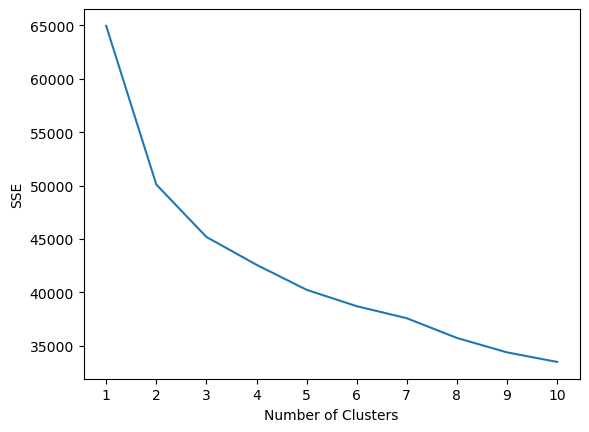

the best k for your model is 3


In [32]:
kmeans_params = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
SSE = []
X = df
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
best_k = findknee.elbow
print('the best k for your model is', best_k)

In [33]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
model = AgglomerativeClustering(n_clusters=n_clusters)
df['Cluster_Label'] = model.fit_predict(df)
df.head()


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Cluster_Label
0,-0.350141,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.11651,-0.097282,2.388846,0.985345,1.679417,0.251004,-1.264505,-1.264505,-1.584605,0
1,-0.350141,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.11651,-0.097282,-0.418612,1.235733,-0.961275,0.251004,1.396361,1.396361,0.631072,1
2,-0.350141,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.11651,-0.097282,-0.418612,0.317643,0.282673,1.180340,-1.264505,-1.264505,-1.584605,0
3,-0.350141,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.11651,-0.097282,-0.418612,-1.268149,-0.918094,1.180340,0.065928,0.065928,0.631072,1
4,1.428354,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.11651,-0.097282,-0.418612,-1.017761,-0.305254,-0.678332,0.065928,0.065928,0.631072,1


Text(0, 0.5, 'Spending')

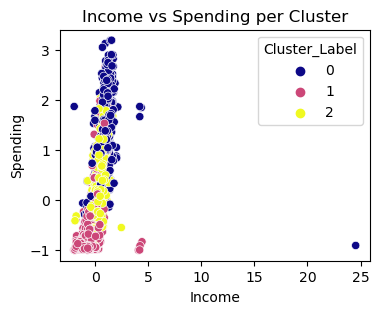

In [35]:
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Income', y='Spent', hue='Cluster_Label', data=df, palette='plasma')
plt.title('Income vs Spending per Cluster')
plt.xlabel('Income')
plt.ylabel('Spending')